### 시계열 데이터 분석 with Pandas

- Time series with pandas
- 시계열 데이터 특성
- ETS 모델
- EWMA 모델

시계열 데이터는 시간 데이터를 인덱스로 하는 연속된 데이터임. 데이터 자체를 DataTime타입으로 바꿔서 작업하게 됨.

- DateTime : 시간이나 날짜 정보는 인덱스인 경우가 많고, 통일도 잘 안되있는 경우가 더러 있음. 판다스에 내장된 기능들로 DateTime으로 다룸


#### time resampling

시계열 데이터 인덱스는 작은 단위로도 이루어진 경우도 있음. 더 넓은 주기로 집계하기 위해서 Time Resampling 이 필ㅛ함.

그룹바이로도 가능하지만 비즈니스 도메인에서 분기나 회계년도를 편리하게 처리할 떄는 그런 방법은 안 된다. 판다스는 이런 경우에 활용할 수 있는 프리퀀시 샘플링 도구를 지원.

나라다라 주말이 다를 수도 있기 때문에 계산할 때도 타임 리샘플링을 하면 편리하게 사용할 수 있음

#### Rolling and Expanding

매일 수집한 데이터에는 노이즈가 있어서 일반적인 트렌드를 구하기 위해서 롤링민 / 무빙 평균을 사용한다.

롤링 함수를 이용해서 주어진 시한 내 평균등을 구할 수 ㅣㅆ습니다.

임의 시간 간격의 window를 만들고 그 안에서 평균 등의 통계적 aggregation을 실행.

볼린저 밴드(Bollinger Band)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
pycon_year = 2018
pycon_month = 8
pycon_day = 17
pycon_hour = 14
pycon_minute = 26
pycon_second = 20

In [8]:
pycon_date = datetime(pycon_year, pycon_month, pycon_day, pycon_hour, pycon_minute, pycon_second)

In [9]:
pycon_date

datetime.datetime(2018, 8, 17, 14, 26, 20)

In [11]:
# 생략도 가능
pycon_date = datetime(pycon_year, pycon_month, pycon_day)

In [13]:
pycon_date.hour

0

In [14]:
main_dates = [datetime(2018, 8, 18), datetime(2019,8,19)]
main_dates

[datetime.datetime(2018, 8, 18, 0, 0), datetime.datetime(2019, 8, 19, 0, 0)]

In [18]:
dt_ind = pd.DatetimeIndex(main_dates)
dt_ind

DatetimeIndex(['2018-08-18', '2019-08-19'], dtype='datetime64[ns]', freq=None)

In [19]:
data = np.random.randn(2, 2)
print(data)

[[ 0.61138859 -0.99768769]
 [ 0.16627661  0.65609869]]


In [22]:
df = pd.DataFrame(data, dt_ind, ['A','B'])
df

,A,B
2018-08-18,0.611389,-0.997688
2019-08-19,0.166277,0.656099


In [23]:
df.index

DatetimeIndex(['2018-08-18', '2019-08-19'], dtype='datetime64[ns]', freq=None)

In [26]:
df.index.argmax()

1

### Time Resampling

In [29]:
df = pd.read_csv('data/walmart_stock.csv')

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [33]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [36]:
# date를 인덱스로 넣어버림.

df.set_index('Date', inplace = True)

In [40]:
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [42]:
# 달만 뽑아내기
df.index.month

# 새로운 인덱스로 저장하기
df['month'] = df.index.month

In [44]:
print(df.head())
print(df.tail())

                 Open       High        Low      Close    Volume  Adj Close  \
Date                                                                          
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235   
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475   
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539   
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220   
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215   

            month  
Date               
2012-01-03      1  
2012-01-04      1  
2012-01-05      1  
2012-01-06      1  
2012-01-09      1  
                 Open       High        Low      Close   Volume  Adj Close  \
Date                                                                         
2016-12-23  69.430000  69.750000  69.360001  69.540001  4803900  69.032411   
2016-12-27  69.300003  69.820000  69.250000  69.699997  4435700  69.1912

In [46]:
# 월 별 합계 (년도가 고려가 안 되었으므로 잘못 만든것.)
df.groupby('month').agg(sum)

,Open,High,Low,Close,Volume,Adj Close
month,,,,,,
1,7212.220003,7268.980024,7161.329970,7216.249978,884947000,6622.456744
2,6905.550015,6957.660026,6857.279998,6916.760031,947122300,6353.198009
3,7670.879987,7725.709989,7631.109984,7680.239984,826236500,7091.568413
4,7660.509997,7712.380057,7614.709994,7662.229996,835404200,7081.601251
5,7657.810029,7708.090032,7616.410015,7664.829990,915029200,7108.951427
6,7686.069953,7730.180014,7644.929985,7684.510007,880198200,7148.457581
7,7956.259989,8001.330024,7918.530036,7965.049980,731996000,7394.593921
8,8037.930001,8086.960005,7985.419985,8033.280041,851971800,7497.262179
9,7362.319978,7405.500031,7319.810032,7362.780021,733834000,6885.571319


In [48]:
df.groupby(df.index.year).sum()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012,16789.670034,16900.529982,16696.629982,16803.780008,2309753800,14847.337229,1625
2013,18966.540019,19083.810035,18860.449977,18980.770062,1751777000,17173.089067,1649
2014,19473.179951,19590.490081,19369.830036,19486.499984,1641934300,18070.847484,1651
2015,18287.489965,18412.170090,18152.770020,18267.760027,2278273900,17345.519416,1655
2016,17509.300053,17644.950012,17393.919992,17525.859994,2361654600,17149.665621,1652


너무 힘드니까 리샘플링을 해보자!!

#### time series offset string 

Link: [Pandas Alias]("https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases")

In [51]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349,6.500000
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179,6.543651
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712,6.551587
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426,6.567460
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229,6.555556


In [52]:
# 첫 날을 리턴하는 함수를 만들어 본다고 하면?

def first_day(entry):
    return entry[0]

In [53]:
df.resample(rule='A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235,1
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708,1
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228,1
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861,1
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713,1


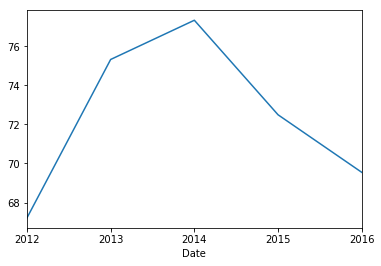

In [55]:
%matplotlib inline
df['Close'].resample('A').mean().plot()


In [57]:
df['Open'].resample('M').max()

Date
2012-01-31    61.799999
2012-02-29    62.400002
2012-03-31    61.410000
2012-04-30    61.959999
2012-05-31    65.410004
2012-06-30    68.940002
2012-07-31    74.760002
2012-08-31    74.919998
2012-09-30    74.959999
2012-10-31    77.599998
2012-11-30    75.129997
2012-12-31    72.250000
2013-01-31    70.120003
2013-02-28    71.589996
2013-03-31    74.930000
2013-04-30    79.230003
2013-05-31    79.099998
2013-06-30    76.379997
2013-07-31    78.680000
2013-08-31    78.620003
2013-09-30    76.500000
2013-10-31    77.269997
2013-11-30    81.169998
2013-12-31    81.209999
2014-01-31    78.860001
2014-02-28    75.489998
2014-03-31    77.080002
2014-04-30    79.839996
2014-05-31    79.730003
2014-06-30    77.459999
2014-07-31    77.129997
2014-08-31    75.930000
2014-09-30    77.129997
2014-10-31    78.110001
2014-11-30    86.180000
2014-12-31    87.080002
2015-01-31    90.800003
2015-02-28    87.260002
2015-03-31    83.930000
2015-04-30    82.279999
2015-05-31    79.370003
2015-06-30 

In [60]:
df['Open'].resample('MS').max()

Date
2012-01-01    61.799999
2012-02-01    62.400002
2012-03-01    61.410000
2012-04-01    61.959999
2012-05-01    65.410004
2012-06-01    68.940002
2012-07-01    74.760002
2012-08-01    74.919998
2012-09-01    74.959999
2012-10-01    77.599998
2012-11-01    75.129997
2012-12-01    72.250000
2013-01-01    70.120003
2013-02-01    71.589996
2013-03-01    74.930000
2013-04-01    79.230003
2013-05-01    79.099998
2013-06-01    76.379997
2013-07-01    78.680000
2013-08-01    78.620003
2013-09-01    76.500000
2013-10-01    77.269997
2013-11-01    81.169998
2013-12-01    81.209999
2014-01-01    78.860001
2014-02-01    75.489998
2014-03-01    77.080002
2014-04-01    79.839996
2014-05-01    79.730003
2014-06-01    77.459999
2014-07-01    77.129997
2014-08-01    75.930000
2014-09-01    77.129997
2014-10-01    78.110001
2014-11-01    86.180000
2014-12-01    87.080002
2015-01-01    90.800003
2015-02-01    87.260002
2015-03-01    83.930000
2015-04-01    82.279999
2015-05-01    79.370003
2015-06-01 

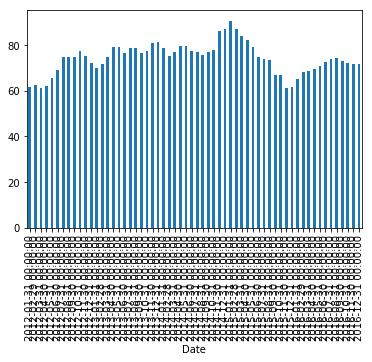

In [62]:
df['Open'].resample('M').max().plot(kind='bar')

In [64]:
daily_daterange=\
pd.date_range(start = datetime(2018,8,1),
end = datetime(2018,9,1),
freq = 'B')

# 휴일 빠짐

In [65]:
daily_daterange

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', freq='B')

In [66]:
daily_df = pd.DataFrame(
    {'value':np.random.rand(len(daily_daterange))},
    index = daily_daterange)

In [67]:
daily_df

,value
2018-08-01,0.296323
2018-08-02,0.290958
2018-08-03,0.857699
2018-08-06,0.420841
2018-08-07,0.256632
2018-08-08,0.622751
2018-08-09,0.768256
2018-08-10,0.982346
2018-08-13,0.400132
2018-08-14,0.212744


In [70]:
daily_df.resample('W-MON').max()

,value
2018-08-06,0.857699
2018-08-13,0.982346
2018-08-20,0.691635
2018-08-27,0.687669
2018-09-03,0.802967


In [71]:
daily_df.resample('M').max()

,value
2018-08-31,0.982346


In [72]:
df = pd.read_csv("data/walmart_stock.csv", index_col='Date')

df.index

Index(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-09',
       '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13', '2012-01-17',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='Date', length=1258)

In [73]:
df.index = pd.to_datetime(df.index)

In [74]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [75]:
df.shift(1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


NaN과 Null의 차이는 뭘까

In [77]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479


In [76]:
df.shift(1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,71.239998,71.239998,69.209999,69.589996,12106800.0,69.082042
2016-12-27,69.430000,69.750000,69.360001,69.540001,4803900.0,69.032411
2016-12-28,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-29,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-30,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456


shift 를 하게되면서 데이터를 잃어버려요 혹은 노이즈를 받게 됩니다

In [78]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-04,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-05,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220
2012-01-06,59.029999,59.549999,58.919998,59.180000,6679300.0,51.616215
2012-01-09,59.430000,59.709999,58.980000,59.040001,6907300.0,51.494109


In [79]:
df.tshift(periods=1, freq = 'M') # 1달만큼 shift를 해줘

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-31,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-31,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-31,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-31,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


In [80]:
df = pd.read_csv("data/walmart_stock.csv",
                 index_col='Date',
                parse_dates = True)

In [82]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [85]:
dateparse = lambda x:pd.datetime.strptime(x, '%Y-%m-%d')

In [94]:
df = \
pd.read_csv('data/walmart_stock.csv', parse_dates = ['Date'], date_parser=dateparse, index_col='Date')

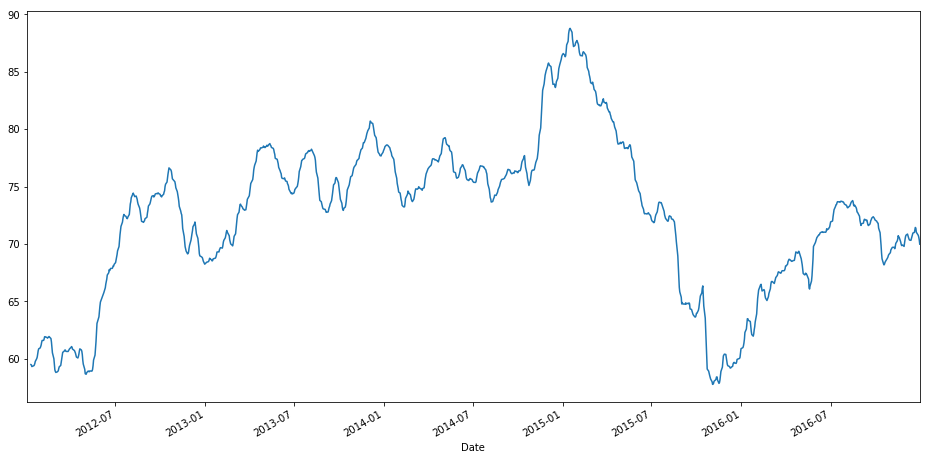

In [95]:
df['Open'].rolling(7).mean().plot(figsize=(16,8))

In [98]:
df['Open'].rolling(7).mean().head(20)

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11    59.495714
2012-01-12    59.469999
2012-01-13    59.322857
2012-01-17    59.397143
2012-01-18    59.450000
2012-01-19    59.578572
2012-01-20    59.767143
2012-01-23    60.017143
2012-01-24    60.154286
2012-01-25    60.440000
2012-01-26    60.715714
2012-01-27    60.868572
2012-01-30    60.945715
2012-01-31    61.057143
Name: Open, dtype: float64

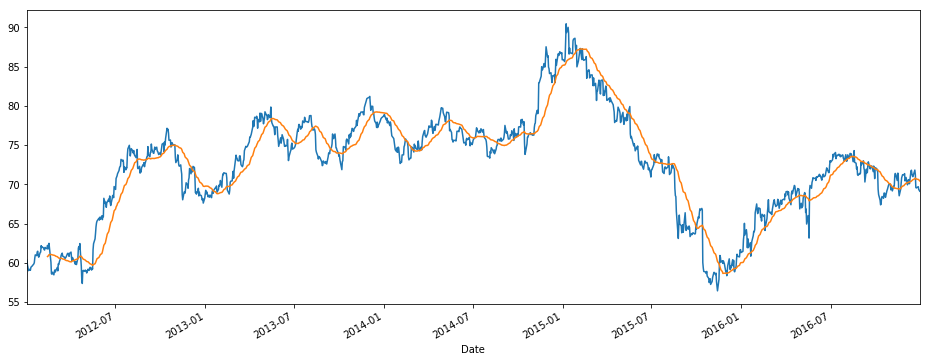

In [102]:
df['Close'].plot(figsize = (16,6))
df.rolling(window=30).mean()['Close'].plot(figsize = (16,6))

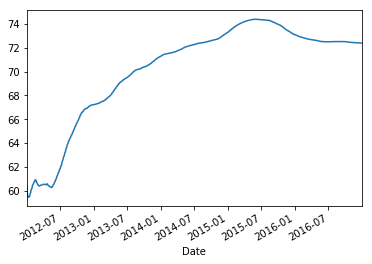

In [108]:
df['Close'].expanding(min_periods = 1).mean().plot()

#sum, mean 등으로 확장하여 그려볼 수 있다

[볼린저 밴드] [참고자료]("https://ko.wikipedia.org/wiki/%EB%B3%BC%EB%A6%B0%EC%A0%80_%EB%B0%B4%EB%93%9C")

In [110]:
df['Close'].rolling(window=20).mean()

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11          NaN
2012-01-12          NaN
2012-01-13          NaN
2012-01-17          NaN
2012-01-18          NaN
2012-01-19          NaN
2012-01-20          NaN
2012-01-23          NaN
2012-01-24          NaN
2012-01-25          NaN
2012-01-26          NaN
2012-01-27          NaN
2012-01-30          NaN
2012-01-31    60.235500
2012-02-01    60.328000
2012-02-02    60.439500
2012-02-03    60.570000
2012-02-06    60.714000
2012-02-07    60.839500
2012-02-08    60.968500
2012-02-09    61.096500
2012-02-10    61.216500
2012-02-13    61.329000
2012-02-14    61.447500
                ...    
2016-11-17    69.982000
2016-11-18    69.992000
2016-11-21    70.001000
2016-11-22    70.039000
2016-11-23    70.101000
2016-11-25    70.171000
2016-11-28    70.231000
2016-11-29    70.298501
2016-11-30    70.355001
2016-12-01    70.416001
2016-12-02 

In [111]:
df['Close Mean'] = df['Close'].rolling(window = 20).mean()

In [112]:
df['Upper'] = df['Close Mean'] + \
df['Close'].rolling(window=20).std()*2

df['Lower'] = df['Close Mean'] - \
df['Close'].rolling(window=20).std()*2

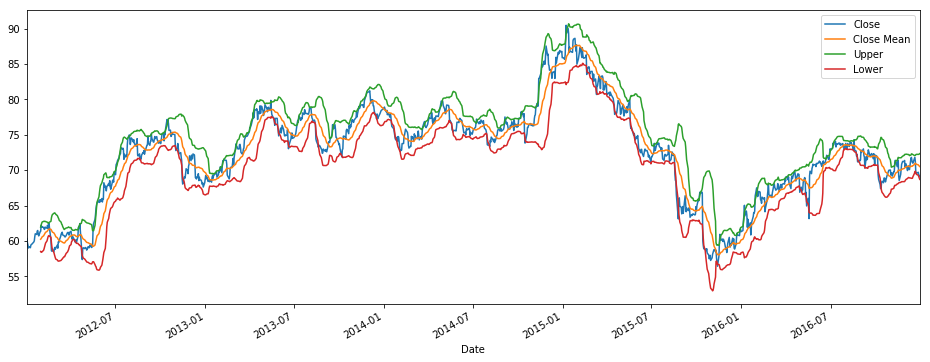

In [113]:
df[['Close', 'Close Mean', 'Upper', 'Lower']].plot(figsize = (16,6))

In [116]:
df_mc = pd.read_csv('data/mcdonalds.csv', index_col = 'Date', parse_dates = True)

In [117]:
df_mc

,Adj. Close,Adj. Volume
Date,,
1970-01-02,0.209761,2825604.0
1970-01-05,0.213316,2210449.5
1970-01-06,0.214501,1951168.5
1970-01-07,0.213316,2728768.5
1970-01-08,0.213316,2242404.0
1970-01-09,0.207391,3288033.0
1970-01-12,0.199095,2462440.5
1970-01-13,0.195540,2380792.5
1970-01-14,0.196109,1003954.5


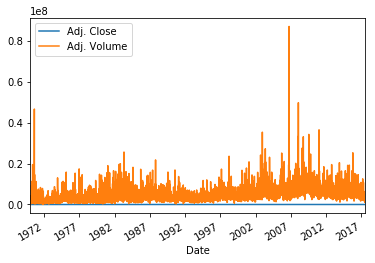

In [118]:
# 초반에 단위가 너무 차이나요.

df_mc.plot()

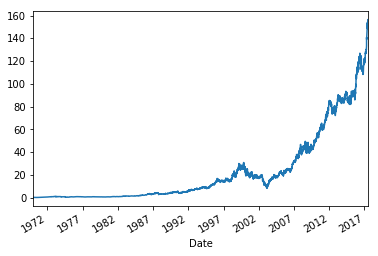

In [119]:
df_mc['Adj. Close'].plot()

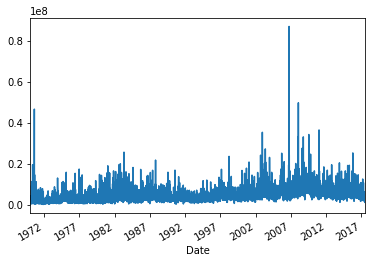

In [120]:
df_mc['Adj. Volume'].plot()

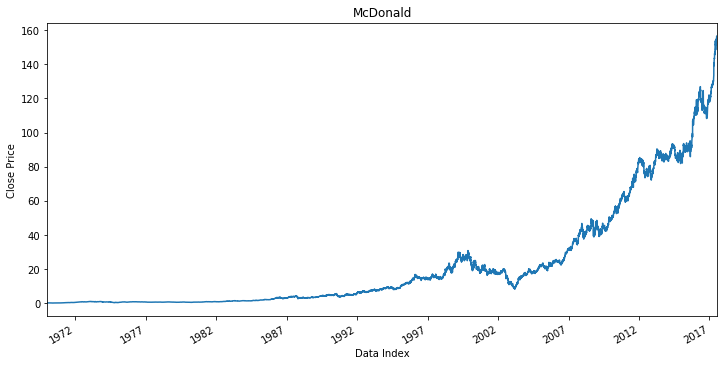

In [124]:
df_mc['Adj. Close'].plot(figsize=(12,6));
plt.ylabel('Close Price');
plt.xlabel('Data Index')
plt.title('McDonald');

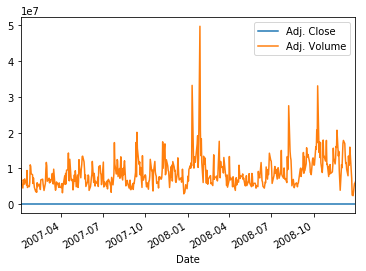

In [126]:
df_mc['2007-01-01' : '2009-01-01'].plot()

In [127]:
idx = df_mc['2007/01/01':'2009-01-01'].index
stock = df_mc['2007/01/01':'2009-01-01']['Adj. Close']

In [131]:
import matplotlib.dates as dates

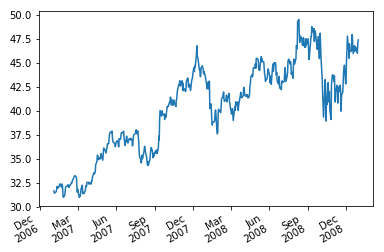

In [134]:
fig, ax = plt.subplots()
ax.plot_date(idx, stock, '-')
# ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

fig.autofmt_xdate() # 겹치지 않게 피해서 그려줌
plt.show()

### time zone

In [208]:
import datetime
from datetime import timezone, datetime, timedelta
import pytz

In [209]:
pytz.timezone('Asia/Seoul')

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [210]:
dt = pd.datetime(2018, 1, 1, 0, 0, 0,
           tzinfo = pytz.timezone('Africa/Cairo'))

In [211]:
dt.astimezone(pytz.timezone('Asia/Seoul'))

datetime.datetime(2018, 1, 1, 6, 55, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [206]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

timezone aware date ~ 

In [212]:
utcnow = pd.datetime.now().astimezone(pytz.utc)

ValueError: astimezone() cannot be applied to a naive datetime

In [153]:
utcnow.astimezone(pytz.timezone('Asia/Seoul')).strftime('%Y-%m-%d %H-%M-%S %Z')

NameError: name 'utcnow' is not defined

In [154]:
datetime.now()

datetime.datetime(2018, 8, 17, 16, 34, 24, 279127)

In [155]:
datetime.today()

datetime.datetime(2018, 8, 17, 16, 34, 31, 375612)

In [162]:
kst = pytz.timezone('Asia/Seoul')

In [165]:
!pip install workalendar

    100% |████████████████████████████████| 71kB 728kB/s ta 0:00:01
    100% |████████████████████████████████| 747kB 2.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for workalendar ... done
  Stored in directory: /Users/Yeoni/Library/Caches/pip/wheels/47/63/43/7c267fdd84261a27a31b61f54087ee100fa290bf107135605f
  Running setup.py bdist_wheel for lunardate ... done
  Stored in directory: /Users/Yeoni/Library/Caches/pip/wheels/3f/d6/2f/93774775cda5c39e59e9e503ce087e9190a5786867ba28f9d7
  Running setup.py bdist_wheel for pyCalverter ... done
  Stored in directory: /Users/Yeoni/Library/Caches/pip/wheels/77/4d/86/db4ff4eca6178dbbd5a365d095f97f6021e2a48f09908be79c
  Running setup.py bdist_wheel for ephem ... done
  Stored in directory: /Users/Yeoni/Library/Caches/pip/wheels/c2/19/af/23739730a62bb43acb1ff256c9234b0f1a94c4666c140a3c1d
Successfully built workalendar lunardate pyCalverter ephem


In [166]:
from workalendar.asia import SouthKorea

In [167]:
cal = SouthKorea()

In [168]:
cal.is_holiday(pd.datetime.today())

False

In [176]:
cal.holidays()

[(datetime.date(2018, 1, 1), 'New year'),
 (datetime.date(2018, 2, 15), "Korean New Year's Day"),
 (datetime.date(2018, 2, 16), "Korean New Year's Day"),
 (datetime.date(2018, 2, 17), "Korean New Year's Day"),
 (datetime.date(2018, 3, 1), 'Independence Day'),
 (datetime.date(2018, 5, 5), "Children's Day"),
 (datetime.date(2018, 5, 22), "Buddha's Birthday"),
 (datetime.date(2018, 6, 6), 'Memorial Day'),
 (datetime.date(2018, 8, 15), 'Liberation Day'),
 (datetime.date(2018, 9, 23), 'Midautumn Festival'),
 (datetime.date(2018, 9, 24), 'Midautumn Festival'),
 (datetime.date(2018, 9, 25), 'Midautumn Festival'),
 (datetime.date(2018, 10, 3), 'National Foundation Day'),
 (datetime.date(2018, 10, 9), 'Hangul Day'),
 (datetime.date(2018, 12, 25), 'Christmas Day')]

In [177]:
from pandas.tseries.holiday import Holiday, AbstractHolidayCalendar

In [213]:
창립기념일 = Holiday("창립기념일", 2018,7,9)

class CustomCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday(title, dt.year, df.month, dt.day) for df, title in cal.holidays()
    ]
    rules.append(창립기념일)

In [214]:
CustomCalendar.rules

[Holiday: New year (year=2018, month=1, day=1, ),
 Holiday: Korean New Year's Day (year=2018, month=2, day=1, ),
 Holiday: Korean New Year's Day (year=2018, month=2, day=1, ),
 Holiday: Korean New Year's Day (year=2018, month=2, day=1, ),
 Holiday: Independence Day (year=2018, month=3, day=1, ),
 Holiday: Children's Day (year=2018, month=5, day=1, ),
 Holiday: Buddha's Birthday (year=2018, month=5, day=1, ),
 Holiday: Memorial Day (year=2018, month=6, day=1, ),
 Holiday: Liberation Day (year=2018, month=8, day=1, ),
 Holiday: Midautumn Festival (year=2018, month=9, day=1, ),
 Holiday: Midautumn Festival (year=2018, month=9, day=1, ),
 Holiday: Midautumn Festival (year=2018, month=9, day=1, ),
 Holiday: National Foundation Day (year=2018, month=10, day=1, ),
 Holiday: Hangul Day (year=2018, month=10, day=1, ),
 Holiday: Christmas Day (year=2018, month=12, day=1, ),
 Holiday: 창립기념일 (year=2018, month=7, day=9, )]

In [215]:
cust_cal = CustomCalendar()

In [216]:
cust_cal.holidays()

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-02-01', '2018-02-01',
               '2018-03-01', '2018-05-01', '2018-05-01', '2018-06-01',
               '2018-07-09', '2018-08-01', '2018-09-01', '2018-09-01',
               '2018-09-01', '2018-10-01', '2018-10-01', '2018-12-01'],
              dtype='datetime64[ns]', freq=None)

In [217]:
from pandas.tseries.offsets import CDay

In [219]:
pd.DatetimeIndex(start = '2018-01-01', end='2018-12-31', freq = CDay(calendar=cust_cal)).to_pydatetime()

array([datetime.datetime(2018, 1, 2, 0, 0),
       datetime.datetime(2018, 1, 3, 0, 0),
       datetime.datetime(2018, 1, 4, 0, 0),
       datetime.datetime(2018, 1, 5, 0, 0),
       datetime.datetime(2018, 1, 8, 0, 0),
       datetime.datetime(2018, 1, 9, 0, 0),
       datetime.datetime(2018, 1, 10, 0, 0),
       datetime.datetime(2018, 1, 11, 0, 0),
       datetime.datetime(2018, 1, 12, 0, 0),
       datetime.datetime(2018, 1, 15, 0, 0),
       datetime.datetime(2018, 1, 16, 0, 0),
       datetime.datetime(2018, 1, 17, 0, 0),
       datetime.datetime(2018, 1, 18, 0, 0),
       datetime.datetime(2018, 1, 19, 0, 0),
       datetime.datetime(2018, 1, 22, 0, 0),
       datetime.datetime(2018, 1, 23, 0, 0),
       datetime.datetime(2018, 1, 24, 0, 0),
       datetime.datetime(2018, 1, 25, 0, 0),
       datetime.datetime(2018, 1, 26, 0, 0),
       datetime.datetime(2018, 1, 29, 0, 0),
       datetime.datetime(2018, 1, 30, 0, 0),
       datetime.datetime(2018, 1, 31, 0, 0),
       datetime.

## 시계열 데이터 특성

- Trends
- Seasonality : 반복되는 트렌드 (ex. 구글 스노우보딩)
- Cyclical : 일정하지 않은 기간의 트랜드 (S&P 500)

- upward
- horizontal/stationary
- downward

statsmodel package

ETS 모델 : 데이터의 패턴을 더 잘 파악하기 위해 또는 예측을 수행하기 위해 스무딩을 하게 된다.
    
Error, Trend, Seasonality 요소도를 활용하여 각각을 더하거나 곱하는 등 스무딩을 함.


이런 작업들을 통해 시계열 모델링 가능.

### ETS Decompostion

In [221]:
airline = pd.read_csv('data/airline_passengers.csv', index_col = 'Month')

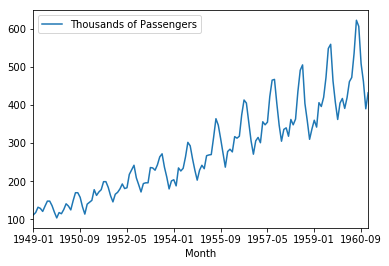

In [222]:
airline.plot()

In [223]:
airline.index = pd.to_datetime(airline.index)

In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [227]:
from pandas.core import datetools

In [232]:
result = seasonal_decompose(airline['Thousands of Passengers'],
                           model = 'multiplicative')

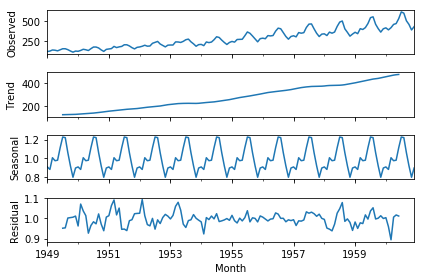

In [236]:
fig = result.plot()

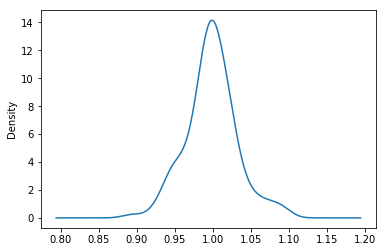

In [240]:
result.resid.plot(kind='kde')

### EWMA 모델

SMA : 평균치이기 떄문에 예측자료로는 부족함. 트렌드만 반영. 이 문제점을 보완하기 위해서 Exponentially Weighted Moving Average사용

최신 트렌드에 가중치를 더 주는 방향으로 작성을 한다.

In [243]:
airline['12month-SMA']=\
airline['Thousands of Passengers'].rolling(window=12).mean()

In [244]:
airline['Smooth-SMA']=\
airline['Thousands of Passengers'].rolling(window=6).mean()

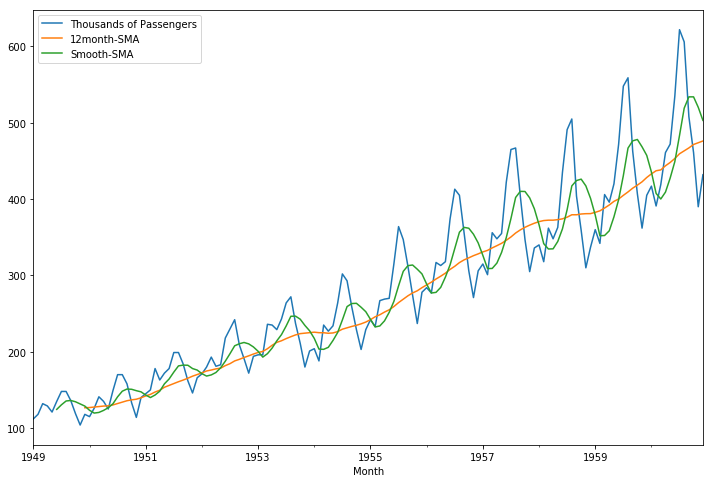

In [247]:
airline.plot(figsize=(12,8))

In [248]:
airline['Thousands of Passengers'].ewm(span=12).mean()

Month
1949-01-01    112.000000
1949-02-01    115.250000
1949-03-01    121.787529
1949-04-01    124.064224
1949-05-01    123.231685
1949-06-01    126.092005
1949-07-01    130.980697
1949-08-01    134.532364
1949-09-01    134.822714
1949-10-01    131.824316
1949-11-01    126.733137
1949-12-01    125.180414
1950-01-01    123.412707
1950-02-01    123.853241
1950-03-01    126.725616
1950-04-01    128.093024
1950-05-01    127.587644
1950-06-01    131.053193
1950-07-01    137.306620
1950-08-01    142.520951
1950-09-01    144.975875
1950-10-01    143.085523
1950-11-01    138.512762
1950-12-01    138.745796
1951-01-01    139.722986
1951-02-01    141.324877
1951-03-01    147.029921
1951-04-01    149.509926
1951-05-01    152.997387
1951-06-01    156.869733
                 ...    
1958-07-01    385.931501
1958-08-01    404.249732
1958-09-01    404.211311
1958-10-01    397.255725
1958-11-01    383.831767
1958-12-01    376.626880
1959-01-01    374.068898
1959-02-01    369.135222
1959-03-01    374.8

In [250]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline['EWMA6'] = airline['Thousands of Passengers'].ewm(span=6).mean()

In [249]:
airline.drop('Smooth-SMA',axis=1, in3place=True)

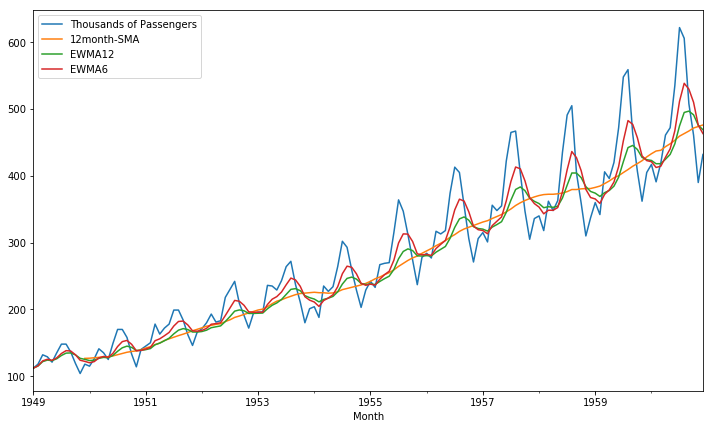

In [251]:
airline.plot(figsize = (12,7))